# Distribution of the energies of colliding particles

Our goal is to see how the kinetic energy is distributed among the particles in a gas, using a simple model for the collisions. In our model, we forget about the position and velocity of the particles, and consider only their kinetic energy. When two particles with energies $E_1$ and $E_2$ collide, they exchange energy so that their energies after the collision are: $$E_1^′ = \alpha(E_1+E_2) \space\&\space E_2^′=(1-\alpha)(E_1+E_2)$$
where $\alpha$ is a random variable uniformly distributed over $[0, 1]$.

In [65]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy import optimize

### Simulation engine
In our model we consider a number $N$ of particles, and the system has an initial energy $E_0$.

__Particle__ class: handles 1 single particle and collision with 1 other particle.

__Simulation__ class: handles the energy transfer collision simulation. The simulation runs for a given number $t$ of timesteps. At each timestep a random number of pairs of particles (between $1$ and $\lfloor N/2 \rfloor$) collide between eachother. Each pair is unique so that for 1 timestep a single particle cannot collide twice. There are thus at maximum: $t*\lfloor N/2 \rfloor$ collisions during the simulation

In [40]:
class Particle:
  def __init__(self, e0, idx):
    "initalise particle energy and index tag"
    self.e = e0
    self.idx = idx

  def collide(self, particle):
    """ update particle energies after collision"""
    alpha = rd.random()
    sum_e = (self.e + particle.e)
    self.e = alpha*sum_e
    particle.e = (1-alpha)*sum_e

class Simulation:
  def __init__(self, num_particles, initial_energy, total_time):
    """ 
    initialisation of model parameters
    generates a list containing particle objects
    """
    self.N = num_particles
    self.E = initial_energy
    self.T = total_time
    self.particles = [Particle(initial_energy/num_particles, i) for i in range(self.N)]
    self.num_collisions = 0

  def generate_collision_idx(self):
    """generates a list of random length of pairs"""
    index = list(range(self.N))
    nb_collision = rd.randint(1, self.N//2)
    pairs = np.random.choice(index, (nb_collision, 2), replace=False)
    return pairs

  def run(self):
    """
    Run simulation for a number of given time steps.
    At each timestep a random number of particles collide
    """
    for t in range(self.T):
      pairs = self.generate_collision_idx()
      for pair in pairs:
        self.particles[pair[0]].collide(self.particles[pair[1]])
        self.num_collisions += len(pairs)

  def plot_distribution(self, ax):
    energies = [p.e for p in self.particles]
    label = f'N={self.N}, E0={self.E}, T={self.T}'
    h = ax.hist(energies, 100, alpha=0.7, label=label)
    ax.set_title('density of probability')
    ax.set_xlabel('energy values (normalised)')
    ax.legend()
    return ax, h

### Utils

In [48]:
def exponential(x, a, b):
  return a*np.exp(-b*x)

def add_fit(ax, h, func):
  """add exponential curve fitting to histogram"""
  popt, _ = optimize.curve_fit(func, h[1][:-1], h[0])
  a, b = popt
  ax.plot(h[0], func(h[0], a, b), 'g--', label='fit')
  ax.legend()
  print('curve fitting paramteres A: {:.2f}, b: {:.5f}'.format(a, b))
  return ax

## Results

### Evolution of the distribution in time

By controlling $t$, we are essentially controlling the number of collisions the system has encountered. As $t$ increases, so does the number of collisions. Initially all the particles have the same energy $E_0/N$. As they collide, the distribution of energies is modified. Evidently the probability distribution of particle energies converges towards the Boltzmann distribution.

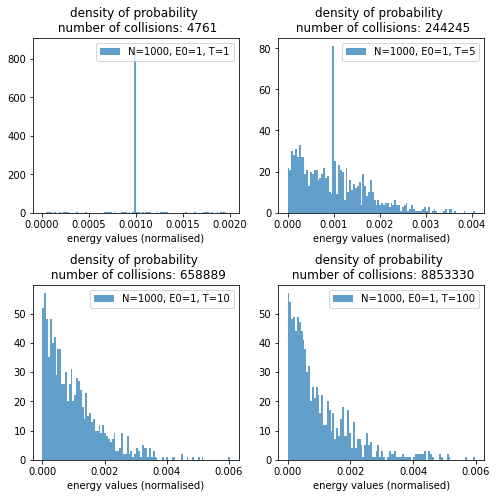

In [47]:
T_range = [1, 5, 10, 100]
N = 1000
E0 = 1
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
sims = []
for i, t in enumerate(T_range):
  sim = Simulation(N, E0, t)
  sim.run()
  sims.append(sim)
  axs[i//2, i%2], _ = sim.plot_distribution(axs[i//2, i%2])
  axs[i//2, i%2].set_title(f'density of probability \n number of collisions: {sim.num_collisions}')

plt.tight_layout(pad=1)
plt.show()

### Variation in the number of particles

Let us see how the distribution of energies respond to an increase in the number $N$ of particles. We shall perform the simulation for a set timeframe $t$ and initial energy $E_0$. We take $N = 10, 100, 1000, 10000$.

As the number of particles increases, the distribution of energies tends towards the boltzmann distribution. The number of particles $N$ acts as the resolution of the distribution. The distribution is only perceptible for high values of $N$.

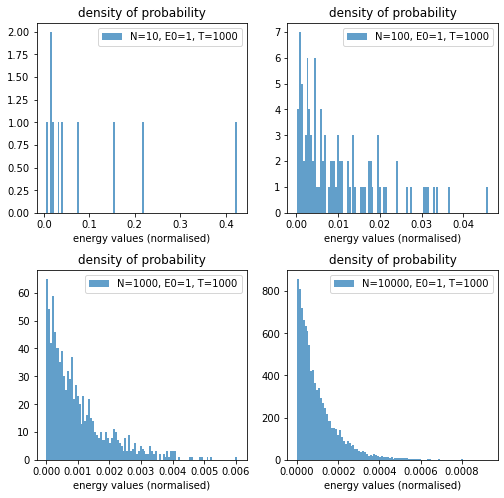

In [62]:
N_range = [10, 100, 1000, 10000]
T = 1000
E0 = 1
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
sims = []
for i, n in enumerate(N_range):
  sim = Simulation(n, E0, T)
  sim.run()
  sims.append(sim)
  axs[i//2, i%2]  = sim.plot_distribution(axs[i//2, i%2])

plt.tight_layout(pad=1)
plt.show()

### Exponential density distribution

We consider the probability to find a particle of energy $E$ at time $t$ to be:
 $$\rho(E) = Ae^{-\dfrac{E}{k_BT}}$$
We can take $k_B=1$.

Here we set $E_0 = 10^6 $ to avoid convergence issues for the curve fitting. 

By fitting the known explicit explonential function to the distribution we are able to experimentally determine the temperature $T$ of the system. 

 - Experimentally we obtain $T_{exp}\sim100K$

 - Theoretically, under the ideal gaz hypothesis $T_{th}=\dfrac{2E_0}{3N}\sim100K$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


curve fitting paramteres A: 1014.45, b: 0.01041


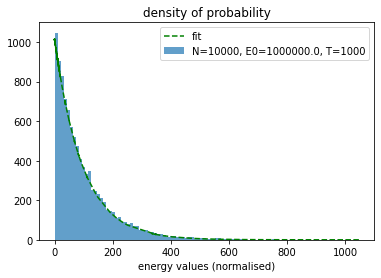

100.0


In [61]:
E0 = 1e6
N = 10000
T = 1000
sim1 = Simulation(N, E0, T)
sim1.run()
ax = plt.subplot(111)
ax, h = sim1.plot_distribution(ax)
ax = add_fit(ax, h, exponential)
plt.show()

### Variation in the intitial energy

Now we shall study how the boltzmann distributions varies when increasing the initial energy $E_0$ of the system, with a fixed number $N$ or particles, and for a given timeframe $t$.

As $E_0$ increases the area under the distribution increases. Indeed by increasing the initial energy of the system, the number of accessible states are increased. 

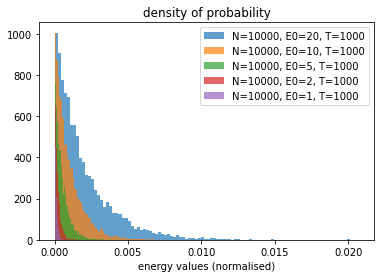

In [64]:
E_range = [1, 2, 5, 10, 20]
N = 10000
T = 1000
ax = plt.subplot(111)
sims = []
for e in reversed(E_range):
  sim = Simulation(N, e, T)
  sim.run()
  sims.append(sim)
  ax, _ = sim.plot_distribution(ax)

plt.show()